## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd
url =  "C://Users//samud//Bureau//Python code//MVA//NLP//nlp-lab-text-classification//data//LeMonde2003_9classes.csv.gz"
df = pd.read_csv(url)
# load dataframe from CSV file
# YOUR CODE HERE


,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


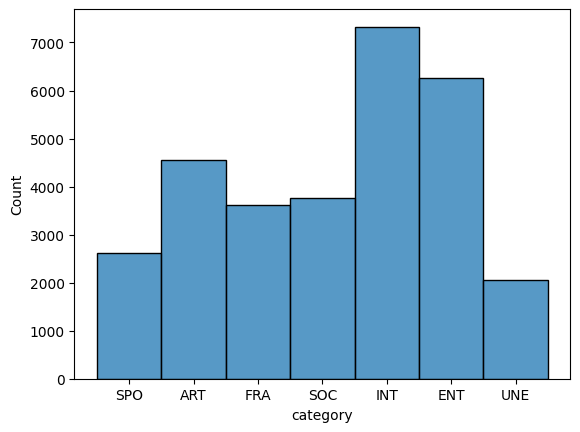

In [2]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE
sns.histplot(df, x="category")
df.head()

In [6]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
print(df.iloc[0])

text        a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed al-fayed est omniprésent le visage souriant du propriétaire égyptien du prestigieux établissement de knightsbridge comme du club anglais est à l'affiche partout sur les calendriers les maillots de corps les publicités en revanche pas la moindre trace de jean tigana lâché par le magnat égyptien ses jours paraissaient comptés depuis quelque temps déjà l'annonce mercredi 26 mars du non- renouvellement de son contrat à la fin de la présente saison n'aura donc surpris personne en mai prochain jean tigana quittera fulham depuis mai 2000 date d'arrivée dans le club qu'il avait contribué à remonter parmi l'élite en mai 2000 l'entraîneur n'a cessé de voir son image se dégrader eclaboussé notamment par le scandale du transfert de steve marlet a l'été 2001 tigana obtient l'autorisation d'acheter un attaquant supplémentaire pour renforcer le secteur offensif de son équipe son choix se po

In [8]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.6 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.6 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.6 kB 281.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.6 kB 595.3 kB/s eta 0:00:01
   ---------------------------------------- 300.6/300.6 kB 1.3 MB/s eta 0:00:00


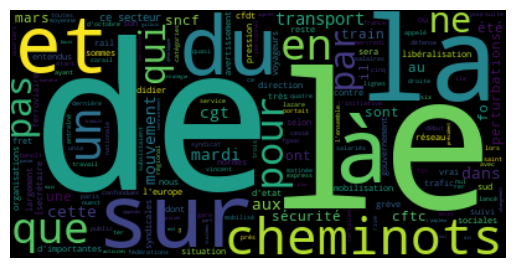

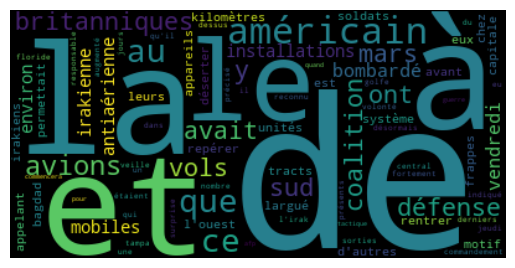

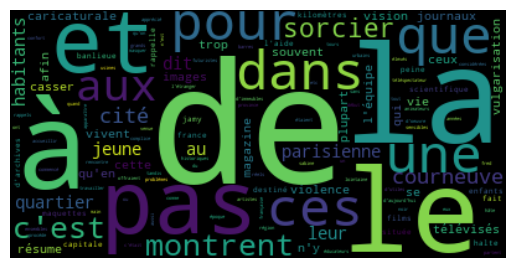

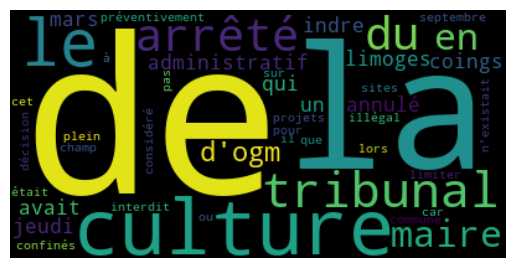

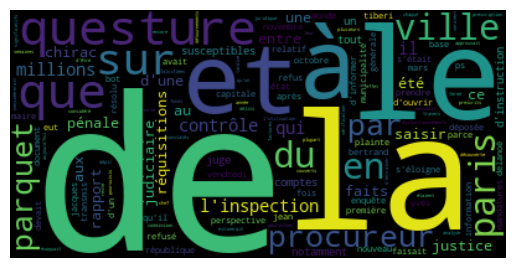

In [15]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    wordcloud = WordCloud().generate(df[df["category"]==cat].iloc[0,0])

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
 # YOUR CODE HERE

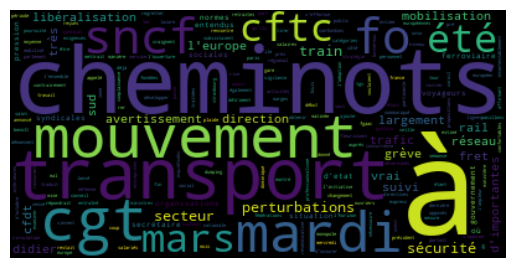

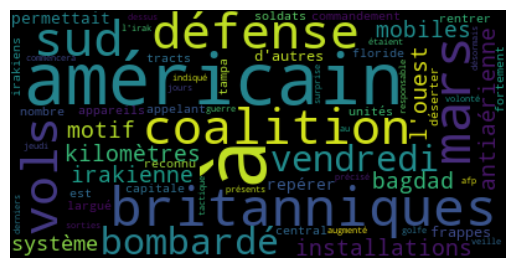

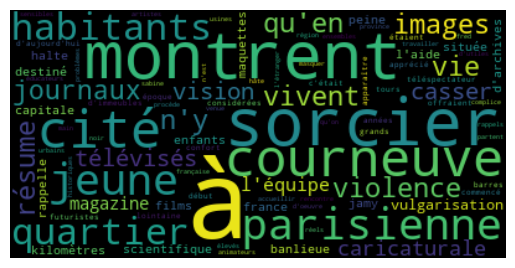

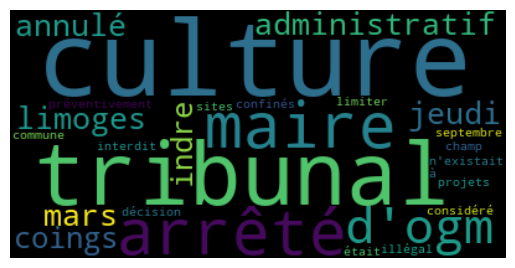

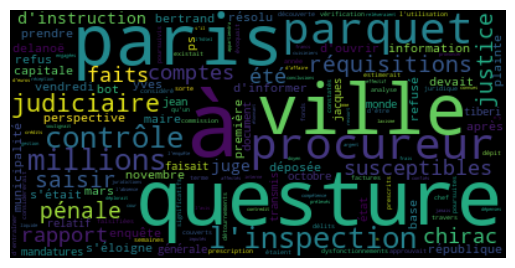

In [19]:
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    text = df[df["category"]==cat].iloc[0,0]
    print
    text = " ".join( [m for m in text.split(" ") if m not in STOPWORDS])
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [24]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
X_train, X_test, y_train, y_test, = train_test_split(df["text"], df["category"])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object

# fit on train data

# apply it on train and dev data
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [35]:
print(X_train_counts.shape)

(22623, 1000)


In [32]:
print(sorted(vectorizer.vocabulary_))

['000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1990', '1991', '1995', '1997', '1998', '1999', '1er', '20', '200', '2000', '2001', '2002', '2003', '2004', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '35', '40', '50', '500', '60', '80', 'abord', 'absence', 'accord', 'accusé', 'accès', 'action', 'actions', 'activité', 'activités', 'actuellement', 'administration', 'affaire', 'affaires', 'affirme', 'affirmé', 'afin', 'afp', 'afrique', 'agence', 'agit', 'ai', 'aide', 'ailleurs', 'ainsi', 'air', 'ait', 'ajoute', 'ajouté', 'al', 'alain', 'allemagne', 'allemand', 'aller', 'alors', 'américain', 'américaine', 'américaines', 'américains', 'an', 'ancien', 'anciens', 'annonce', 'annoncé', 'année', 'années', 'ans', 'août', 'appel', 'après', 'argent', 'armes', 'armée', 'arrivée', 'art', 'artistes', 'assemblée', 'assez', 'association', 'assurance', 'assure', 'assurer', 'attentat', 'attentats', 'au', 'aucun', 'aucune', 'audience', 'augmentation', 'aujo

In [40]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
mod = MultinomialNB().fit(X_train_counts.toarray(), y_train)
# Train 
ypred = mod.predict(X_test_counts.toarray())
# Evaluate 

from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average='macro'))

0.7204985415009282
0.6636198368629577


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [41]:

from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


0.7409175285070273
0.6451134857937563


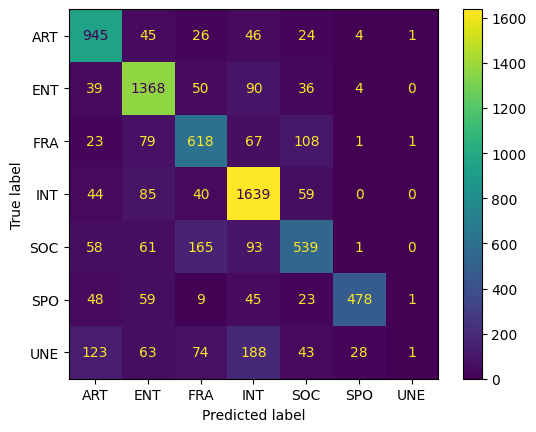

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# YOUR CODE HERE

mod = MultinomialNB().fit(X_train_tf.toarray(), y_train)
# Train 
ypred = mod.predict(X_test_tf.toarray())
# Evaluate 

from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average='macro'))
import numpy as np
cm = confusion_matrix(y_test, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=np.unique(df["category"])).plot() 


## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

# Plot the statistics of classes

# Make the splits and print the sizes for checking

# Apply TfidfVectorizer

# Train MultinomialNB

# Print accuracy

# Print confusion matric


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [56]:
!pip install transformers

     ---------------------------------------- 0.0/129.4 kB ? eta -:--:--
     --- ------------------------------------ 10.2/129.4 kB ? eta -:--:--
     --- ------------------------------------ 10.2/129.4 kB ? eta -:--:--
     ----------------- ------------------- 61.4/129.4 kB 409.6 kB/s eta 0:00:01
     ------------------------------- ---- 112.6/129.4 kB 595.3 kB/s eta 0:00:01
     ------------------------------------ 129.4/129.4 kB 633.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.4 MB 2.0 MB/s eta 0:00:05
    --------------------------------------- 0.2/8.4 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.4 MB 3.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.4 MB 2.8 MB/s eta 0:00:03
   --- -------

In [64]:
pip install datasets

  Using cached fsspec-2023.10.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached frozenlist-1.4.1-cp39-cp39-win_amd64.whl.metadata (12 kB)
  Using cached yarl-1.9.4-cp39-cp39-win_amd64.whl.metadata (32 kB)
  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
   ---------------------------------------- 0.0/536.6 kB ? eta -:--:--
   -- ------------------------------------- 30.7/536.6 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 61.4/536.6 kB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 122.9/536.6 kB 1.0 MB/s eta 0:00:01
   -------------- ------------------------- 194.6/536.6 kB 1.2 MB/s eta 0:00:01
   -------------------- ------------------- 276.5/536.6 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 358.4/536.6 kB 1.4 MB/s eta 0:00:01
   -------------------------------- ------- 430.1/536.6 kB 1.4 MB/s eta 0:00:01
   ----------------------------------

  You can safely remove it manually.


In [70]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install evaluate

   ---------------------------------------- 0.0/84.1 kB ? eta -:--:--
   -------------------------------------- - 81.9/84.1 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 84.1/84.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install accelerate -U

   ---------------------------------------- 0.0/280.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/280.0 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 112.6/280.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 280.0/280.0 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from datasets import load_dataset
dataset = load_dataset("C://Users//samud//Bureau//Python code//MVA//NLP//nlp-lab-text-classification//data", 
                       data_files="LeMonde2003_9classes.csv.gz", 
                       split="train[:10%]+train[-80%:]"
                      )

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)


tokenized_imdb = dataset.map(preprocess_function, batched=True)
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenized_imdb)

import evaluate
accuracy = evaluate.load("accuracy")

import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

labels = np.unique(df["category"])
id2label = {i:lab for i,lab in enumerate(labels)}
label2id = {lab:i for i,lab in enumerate(labels)}

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=len(labels), id2label=id2label, label2id=label2id
)

training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb["text"],
    eval_dataset=tokenized_imdb["category"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()